# **Cosmetics datasets. Предобработка данных о косметических средствах**

## **Бизнес-задача**

Создание системы рекомендаций косметических продуктов на основе состава, которая помогает пользователю находить безопасные и подходящие средства, предлагает продукты с похожим химическим профилем, помогает визуализировать состав продуктов и группировать их по сходству.

## 1. Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cosmetics.csv')

## 2. Изучение данных

### 2.1 Первые и последние строки

In [ ]:
display(df.head())
display(df.tail())

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0
1471,Sun protect,DERMAFLASH,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,45,0.0,Visit the DERMAFLASH boutique,1,1,1,1,1


Данные содержат информацию о косметических продуктах с различными характеристиками. Есть столбцы с названием продукта, брендом, ценой, рейтингом, ингредиентами и показателями для разных типов кожи.

### 2.2 Случайная выборка

In [ ]:
display(df.sample(5))

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
1114,Eye cream,ALGENIST,Complete Eye Renewal Balm,68,4.0,"Water, Stearic Acid, Isopropyl Isostearate, Gl...",1,1,1,1,1
924,Face Mask,ERNO LASZLO,Hydra-Therapy Memory Sleep Mask,95,4.7,Visit the Erno Laszlo boutique,0,0,0,0,0
633,Treatment,COVER FX,Mattifying Primer With Anti-Acne Treatment,38,3.6,"Cyclopentasiloxane, Salix Nigra (Willow) Bark ...",0,0,0,0,0
1223,Eye cream,HUM NUTRITION,Wing Man™ Dark Circle Remedy Supplement,25,3.8,"Milk Thistle Extract, Dandelion Root, Artichok...",0,0,0,0,0
509,Cleanser,SHISEIDO,Pureness Balancing Softener Alcohol-Free,24,4.4,"Water, Dipropylene Glycol, Butylene Glycol, Gl...",0,0,0,0,0


Случайная выборка подтверждает разнообразие данных.

### 2.3 Информация о датафрейме

In [ ]:
display(df.info())
display(pd.DataFrame({
    'Размер датафрейма': [df.shape[0]],
    'Количество столбцов': [df.shape[1]]
}))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


None

,Размер датафрейма,Количество столбцов
0,1472,11


Датафрейм содержит 11 столбцов и 1472 строки. Есть столбцы с разными типами данных (object, float64, int64).

### 2.4 Описательная статистика

In [ ]:
display(df.describe())

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Средняя цена продуктов - около 56 долларов, максимальная цена - 370 долларов, минимальная цена - 3 доллара.

## 3. Предобработка данных

### 3.1 Наименования столбов

In [ ]:
df.columns = df.columns.str.lower()
display(pd.DataFrame(df.columns, columns=['Названия столбцов']))

,Названия столбцов
0,label
1,brand
2,name
3,price
4,rank
5,ingredients
6,combination
7,dry
8,normal
9,oily


Названия столбцов приведены к нижнему регистру.

### 3.2 Пропущенные значения

In [ ]:
missing_data = pd.DataFrame({'Количество пропусков': df.isnull().sum()})
display(missing_data)

df_clean = df.dropna()
display(pd.DataFrame({
    'Исходный размер': [df.shape[0]],
    'После очистки': [df_clean.shape[0]],
    'Удалено строк': [df.shape[0] - df_clean.shape[0]]
}))

,Количество пропусков
label,0
brand,0
name,0
price,0
rank,0
ingredients,0
combination,0
dry,0
normal,0
oily,0


,Исходный размер,После очистки,Удалено строк
0,1472,1472,0


В данных отсутствуют пропущенные значения.

### 3.3 Типы данных

In [ ]:
display(pd.DataFrame(df_clean.dtypes, columns=['Тип данных']))

,Тип данных
label,object
brand,object
name,object
price,int64
rank,float64
ingredients,object
combination,int64
dry,int64
normal,int64
oily,int64


Все типы данных выглядят корректно.

### 3.4 Дубликаты

In [ ]:
duplicates_info = pd.DataFrame({
    'Тип проверки': ['Полные дубликаты', 'Дубликаты по названию'],
    'Количество': [
        df_clean.duplicated().sum(),
        df_clean.duplicated(['name']).sum()
    ]
})
display(duplicates_info)

if df_clean.duplicated(['name']).sum() > 0:
    display(df_clean[df_clean.duplicated(['name'], keep=False)]
        .sort_values('name')[['brand', 'name']].head())

,Тип проверки,Количество
0,Полные дубликаты,0
1,Дубликаты по названию,0


Дубликатов не найдено.

### 3.5 Очистка текста

In [ ]:
text_columns = ['label', 'brand', 'name', 'ingredients']
df_clean[text_columns] = df_clean[text_columns].apply(lambda x: x.str.lower().str.strip())

In [ ]:
from google.colab import files
df.to_csv('cosmetics_clear.csv', index=False)
files.download('cosmetics_clear.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4. Промежуточные выводы

- данные успешно загружены и проанализированы
- названия столбцов приведены к нижнему регистру
- типы данных проверены и оставлены без изменений
- дубликатов и пропущенных значений не обнаружено


# **Исследовательский анализ данных о косметических средствах**

## 1. Индексация данных

### 1.1 Координатная индексация

In [ ]:
df = pd.read_csv('cosmetics_clear.csv')

In [ ]:
# строки с 10 по 15
df.iloc[10:15]

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
10,Moisturizer,FRESH,Lotus Youth Preserve Moisturizer,45,4.3,"Water, Glycerin, Propylene Glycol Dicaprylate/...",0,0,0,0,0
11,Moisturizer,KIEHL'S SINCE 1851,Midnight Recovery Concentrate,47,4.4,Caprylic/Capric Triglyceride Dicaprylyl Carbon...,1,1,1,1,1
12,Moisturizer,BELIF,The True Cream Aqua Bomb,38,4.5,"Water, Dipropylene Glycol, Glycerin, Methl Tri...",1,0,1,1,0
13,Moisturizer,SUNDAY RILEY,Luna Sleeping Night Oil,105,4.1,"Persea Gratissima (Extra Virgin, Cold Pressed ...",1,1,1,1,1
14,Moisturizer,FARMACY,Honeymoon Glow AHA Resurfacing Night Serum wit...,58,4.6,"Water, Lactic Acid, Propanediol, Jojoba Esters...",1,1,1,1,1


In [ ]:
# 20, 30 и 40 строки
df.iloc[[20, 30, 40]]

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
20,Moisturizer,LA MER,Crème de la Mer Mini,85,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
30,Moisturizer,FRESH,Black Tea Kombucha Antioxidant Essence,68,4.4,"Water, Saccha-romyces Ferment Filtrate, Glycer...",0,0,0,0,0
40,Moisturizer,TATCHA,Luminous Dewy Skin Mist,48,4.0,"Water, Glycerin, Squalane (Olive Origin), Cycl...",1,1,1,0,1


In [ ]:
# столбцы Brand и Price для первых 10 строк
df.loc[:9, ['brand', 'price']]

,brand,price
0,LA MER,175
1,SK-II,179
2,DRUNK ELEPHANT,68
3,LA MER,175
4,IT COSMETICS,38
5,TATCHA,68
6,DRUNK ELEPHANT,60
7,DRUNK ELEPHANT,72
8,KIEHL'S SINCE 1851,29
9,LA MER,325


### 1.2 Логическая индексация

In [ ]:
# товары дороже 300 долларов
df[df['price'] > 300]

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0
587,Treatment,LA MER,The Concentrate,370,3.9,"Cyclopentasiloxane, Algae (Seaweed) Extract, G...",0,0,0,0,0
601,Treatment,LA MER,The Regenerating Serum,345,3.9,"Water, Algae (Seaweed) Extract, Dimethicone, H...",1,1,1,1,1


In [ ]:
# увлажняющие кремы с рейтингом выше 4.7
df[(df['label'] == 'Moisturizer') & (df['rank'] > 4.7)]

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0
51,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
129,Moisturizer,FRESH,Vitamin Nectar Antioxidant Face Mist,44,4.8,"Water, Glycerin, Penty- lene Glycol, PEG-60 Hy...",0,0,0,0,0
131,Moisturizer,YOUTH TO THE PEOPLE,Superberry Hydrate + Glow Oil,44,4.8,"Helianthus Annuus (Sunflower) Seed Oil*, Dicap...",1,1,1,0,1
149,Moisturizer,REN CLEAN SKINCARE,Evercalm™ Overnight Recovery Balm,48,4.9,"Coco-Caprylate/Caprate, Glycerin, Water, Almon...",1,1,1,1,1
177,Moisturizer,NURSE JAMIE,Tech Neck Prevention Kit,69,5.0,-Silicone Wrap: Creates a hydrating climate fo...,0,0,0,0,0
194,Moisturizer,CLINIQUE,Limited Edition Dramatically Different™ Moistu...,39,5.0,"Water, Dimethicone, Isododecane, Butylene Glyc...",1,0,0,1,0
196,Moisturizer,SHISEIDO,Bio-Performance Glow Revival Cream,105,4.8,"Water, Dipropylene Glycol, Dimethicone, Glycer...",0,0,0,0,0
228,Moisturizer,DIOR,Capture Totale Multi-Perfection Creme Refill,140,5.0,Visit the Dior boutique,0,0,0,0,0
231,Moisturizer,ESTÉE LAUDER,Advanced Night Repair Intensive Recovery Ampoules,115,4.9,Advanced Night Rpr Int Rcv Ampoule Division: E...,1,1,1,1,1


In [ ]:
# продукты бренда DRUNK ELEPHANT
df[df['brand'] == 'DRUNK ELEPHANT']

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
15,Moisturizer,DRUNK ELEPHANT,The Littles™,90,4.4,"Beste™ No.9 Jelly Cleanser: Water, Sodium Laur...",1,1,1,1,0
26,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil Mini,40,4.5,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
298,Cleanser,DRUNK ELEPHANT,T.L.C. Sukari Babyfacial™,80,4.5,"Water, Glycolic Acid, Hydroxyethyl Acrylate/So...",1,1,1,1,0
299,Cleanser,DRUNK ELEPHANT,T.L.C. Framboos™ Glycolic Night Serum,90,4.3,"Water, Glycolic Acid, Butylene Glycol, Glyceri...",1,1,1,1,0
317,Cleanser,DRUNK ELEPHANT,Beste™ No. 9 Jelly Cleanser,34,4.1,"Water, Sodium Lauroyl Methyl Isethionate, Glyc...",1,0,1,1,1
345,Cleanser,DRUNK ELEPHANT,Baby Pekee Bar™ + Juju Bar Travel Duo,18,4.5,-Heilmoor Clay: Tones and detoxifies the skin....,1,1,1,1,0
364,Cleanser,DRUNK ELEPHANT,Pekee Bar™,28,4.5,"Sodium Coco-Sulfate, Disodium Lauryl Sulfosucc...",1,1,1,1,1


In [ ]:
# продукты для чувствительной кожи
df[df['sensitive'] == 1]

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1457,Sun protect,MDSOLARSCIENCES,Quick Dry Body Spray With SolSci-X™ Broad Spec...,20,3.9,"SD Alcohol 40, Butyloctyl Salicylate, Polyeste...",1,1,1,1,1
1458,Sun protect,COOLA,Sport Continuous Spray SPF 30 - Unscented,32,5.0,"Alcohol (Organic), Algae Extract (Organic), Al...",1,1,1,1,1
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38,4.1,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1,1,1,1,1
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1


In [ ]:
# продукты с ценой от 250 до 300 долларов
df[(df['price'] >= 250) & (df['price'] <= 300)]

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
85,Moisturizer,FRESH,Crème Ancienne®,290,4.4,"Limnanthes Alba (Meadowfoam) Seed Oil, Water, ...",1,1,1,1,1
162,Moisturizer,LA MER,The Moisturizing Soft Lotion,270,3.6,"Algae (Seaweed) Extract, Petrolatum, Isocetyl ...",1,1,1,1,1
170,Moisturizer,SHISEIDO,Future Solution LX Total Regenerating Cream,280,4.0,"Dipropylene Glycol, Glycerin, Dimethicone, But...",1,1,1,1,1
293,Moisturizer,LA MER,The Moisturizing Matte Lotion,270,3.9,"Water, Algae (Seaweed) Extract, Propanediol, S...",0,0,1,1,0
665,Treatment,BIOEFFECT,30 Day Treatment,290,5.0,"Glycerin, Water, Sodium Hyaluronate, Trometham...",1,1,1,1,1
669,Treatment,LANCER,Lift Serum Intense with Stem Cell Recovery Com...,275,5.0,"Water, Glycerin, Cyclopentasiloxane, Caprylic/...",1,1,1,0,0
708,Treatment,LANCER,Younger® Pure Youth Serum with MIMIXYL™,275,5.0,"Water, Aloe Barbadensis Leaf Extract, Dimethyl...",1,1,1,0,0
790,Treatment,SHISEIDO,Future Solution LX Intensive Firming Contour S...,300,4.3,"Dimethicone, Dipropylene Glycol, Glycerin, Bis...",1,1,1,1,1
818,Treatment,FRESH,Crème Ancienne Face Oil Elixir,265,3.6,"Limnanthes Alba (Meadowfoam) Seed Oil, Simmond...",1,1,1,1,1
840,Face Mask,LA MER,The Lifting and Firming Mask,250,4.9,Declustered Water (-)/Aqua/Eau De-Structuree (...,0,0,0,0,0


## 2. Сортировка данных

In [ ]:
# по цене (по убыванию)
df.sort_values('price', ascending=False).head(5)

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
587,Treatment,LA MER,The Concentrate,370,3.9,"Cyclopentasiloxane, Algae (Seaweed) Extract, G...",0,0,0,0,0
601,Treatment,LA MER,The Regenerating Serum,345,3.9,"Water, Algae (Seaweed) Extract, Dimethicone, H...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0
790,Treatment,SHISEIDO,Future Solution LX Intensive Firming Contour S...,300,4.3,"Dimethicone, Dipropylene Glycol, Glycerin, Bis...",1,1,1,1,1
665,Treatment,BIOEFFECT,30 Day Treatment,290,5.0,"Glycerin, Water, Sodium Hyaluronate, Trometham...",1,1,1,1,1


In [ ]:
# по рейтингу (по возрастанию)
df.sort_values('rank').head(5)

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
1471,Sun protect,DERMAFLASH,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,45,0.0,Visit the DERMAFLASH boutique,1,1,1,1,1
452,Cleanser,MURAD,Clarifying Toner,24,0.0,"Water, Witch Hazel Water, Butylene Glycol, Alc...",0,0,0,0,0
752,Treatment,PETER THOMAS ROTH,AHA/BHA Acne Clearing Gel,54,0.0,"Alcohol Denat.,Aloe Barbadensis Leaf Juice, Ar...",0,0,0,0,0
279,Moisturizer,CLINIQUE,Limited Edition Dramatically Different Moistur...,39,0.0,"Water, Mineral Oil/Paraffinum Liquidum/Huile M...",1,1,0,0,0
1227,Eye cream,BEAUTYBIO,GloPRO® EYE MicroTip™ Attachment Head,35,0.0,Visit the BeautyBio boutique,0,0,0,0,0


In [ ]:
# по бренду и цене
df.sort_values(['brand', 'price'])

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
576,Cleanser,ALGENIST,Hydrating Essence Toner,25,4.4,"Water, Butylene Glycol, Sodium PCA, Hamamelis ...",0,0,0,0,0
216,Moisturizer,ALGENIST,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,28,4.4,"Cyclopentasiloxane, Water, Alcohol Denat., Gly...",0,0,0,0,0
514,Cleanser,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,"Water, Caprylic/Capric Triglyceride, Hydroxyet...",0,0,0,0,0
547,Cleanser,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,"C12-15 Alkyl Benzoate, Ethylhexyl Palmitate, C...",0,0,0,0,0
810,Treatment,ALGENIST,REVEAL Concentrated Color Correcting Drops,38,3.8,"Water, Dimethicone, Mica, Nylon-12, PEG-10 Dim...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
927,Face Mask,YOUTH TO THE PEOPLE,Superfood Skin Reset Antioxidant Mask,44,4.4,"Water, Kaolin, Organic Glycerin, Organic Brass...",1,1,1,1,1
115,Moisturizer,YOUTH TO THE PEOPLE,Superfood Air-Whip Hyaluronic Acid Moisture Cream,48,4.2,"Water, Helianthus Annuus (Sunflower) Seed Oil,...",1,0,1,1,1
51,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
692,Treatment,YOUTH TO THE PEOPLE,Superfood Firm and Brighten Vitamin C Serum,62,3.9,"Water, Lactic Acid, Citric Acid, Malic Acid, G...",1,1,1,1,1


In [ ]:
# самые дорогие средства для сухой кожи
df[df['dry'] == 1].sort_values('price', ascending=False).head(5)

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
601,Treatment,LA MER,The Regenerating Serum,345,3.9,"Water, Algae (Seaweed) Extract, Dimethicone, H...",1,1,1,1,1
790,Treatment,SHISEIDO,Future Solution LX Intensive Firming Contour S...,300,4.3,"Dimethicone, Dipropylene Glycol, Glycerin, Bis...",1,1,1,1,1
665,Treatment,BIOEFFECT,30 Day Treatment,290,5.0,"Glycerin, Water, Sodium Hyaluronate, Trometham...",1,1,1,1,1
85,Moisturizer,FRESH,Crème Ancienne®,290,4.4,"Limnanthes Alba (Meadowfoam) Seed Oil, Water, ...",1,1,1,1,1
170,Moisturizer,SHISEIDO,Future Solution LX Total Regenerating Cream,280,4.0,"Dipropylene Glycol, Glycerin, Dimethicone, But...",1,1,1,1,1


In [ ]:
# самые дешевые продукты для комбинированной кожи
df[df['combination'] == 1].sort_values('price').head(5)

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
1063,Face Mask,SEPHORA COLLECTION,Nose Mask - Pineapple,3,2.9,"Water, Hydroxyethyl Urea, Glycereth-26, Glycer...",1,1,1,1,1
966,Face Mask,SEPHORA COLLECTION,Sleeping Mask - Coconut Water,4,5.0,"Water, Butylene Glycol, Glycerin, Betaine, Phe...",1,1,1,1,1
974,Face Mask,SEPHORA COLLECTION,Sleeping Mask - Aloe Vera,4,5.0,"Water, Butylene Glycol, Glycerin, Phenoxyethan...",1,1,1,1,1
1040,Face Mask,SEPHORA COLLECTION,After-Sun Mask - Watermelon,5,4.3,"Water, Glycerin, Dipropylene Glycol, Methylpro...",1,1,1,1,1
1079,Face Mask,SEPHORA COLLECTION,SUPERMASK - The Primer Mask,6,4.2,"Water, Glycerin, Ethylhexyl Stearate, Methylpr...",1,1,1,1,1


## 3. Фильтрация данных

### 3.1 Метод query

In [ ]:
# средства бренда SK-II дороже 100 долларов
df.query("brand == 'SK-II' and price > 100")

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
19,Moisturizer,SK-II,R.N.A. POWER Face Cream,230,4.3,"Water, Glycerin, Galactomyces Ferment Filtrate...",0,1,1,0,1
29,Moisturizer,SK-II,GenOptics Aura Essence Serum,240,4.1,"Water, Galactomyces Ferment Filtrate (Pitera),...",1,1,1,1,1
116,Moisturizer,SK-II,Facial Treatment Essence Karan Singh Limited E...,229,0.0,"Galactomyces Ferment Filtrate*, Butylene Glyco...",0,0,0,0,0
147,Moisturizer,SK-II,GenOptics Spot Essence Serum,225,4.2,"Water, Galactomyces Ferment Filtrate*, Butylen...",1,1,1,1,1
208,Moisturizer,SK-II,Cellumination Cream EX,160,4.3,"Water, Galactomyces Ferment Filtrate (Pitera),...",1,1,1,1,1
281,Moisturizer,SK-II,Facial Treatment Oil,150,4.5,"Galactomyces Ferment Filtrate*, Squalane, Simm...",0,0,0,0,0
629,Treatment,SK-II,R.N.A. POWER Anti-Aging Essence Serum,195,4.4,"Water, Butylene Glycol, Glycerin, Galactomyces...",1,1,1,1,1
828,Face Mask,SK-II,Facial Treatment Mask,135,4.4,"Water, Saccharomycopsis Ferment Filtrate*, But...",1,1,1,1,1
852,Face Mask,SK-II,Overnight Miracle Mask,105,3.8,"Galactomyces Ferment Filtrate*, Water, Glyceri...",1,1,1,1,1


In [ ]:
# увлажняющие кремы для жирной кожи с рейтингом больше 4
df.query("label == 'Moisturizer' and oily == 1 and rank >= 4")

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
287,Moisturizer,ALGENIST,POWER Recharging Night Pressed Serum,95,4.4,"Cocos Nucifera (Coconut) Water, Water (Aqua, E...",1,1,1,1,1
292,Moisturizer,SATURDAY SKIN,Featherweight Daily Moisturizing Cream,49,4.6,"Water, Butylene Glycol, Ethylhexyl Palmitate, ...",1,1,1,1,1
294,Moisturizer,HERBIVORE,Jasmine Green Tea Balancing Toner,39,4.2,"Jasminum Officinale (Jasmine) Flower Water, Ha...",1,0,0,1,1
296,Moisturizer,KATE SOMERVILLE,Goat Milk Moisturizing Cream,65,4.1,"Water, Ethylhexyl Palmitate, Myristyl Myristat...",1,1,1,1,1


In [ ]:
# средства брендов LA MER или TATCHA
df.query("brand in ['LA MER', 'TATCHA']")

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0
20,Moisturizer,LA MER,Crème de la Mer Mini,85,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
31,Moisturizer,TATCHA,Pure One Step Camellia Cleansing Oil,48,4.5,"Cetyl Ethylhexanoate, Oryza Sativa (Rice) Bran...",1,1,1,1,1
40,Moisturizer,TATCHA,Luminous Dewy Skin Mist,48,4.0,"Water, Glycerin, Squalane (Olive Origin), Cycl...",1,1,1,0,1
52,Moisturizer,LA MER,The Renewal Oil,245,4.2,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",1,1,1,1,1
59,Moisturizer,TATCHA,The Silk Cream,120,4.3,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,1,1,0,1
71,Moisturizer,TATCHA,Luminous Dewy Skin Night Concentrate,110,4.5,"Water, Glycerin, Propanediol, Squalane, Cyclop...",1,1,1,0,1


In [ ]:
# средства с SPF
df.query("name.str.contains('SPF')", engine='python')

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
21,Moisturizer,BAREMINERALS,COMPLEXION RESCUE™ Tinted Moisturizer Broad Sp...,30,3.9,"Water, Coconut Alkanes, Propanediol, Squalane,...",0,0,0,0,0
34,Moisturizer,IT COSMETICS,Your Skin But Better CC+ Cream Oil-Free Matte ...,38,3.9,"Water, Dimethicone, Butylene Glycol Dicaprylat...",1,1,1,1,0
39,Moisturizer,DR. JART+,Premium Beauty Balm SPF 45,39,4.2,#NAME?,0,0,0,0,0
54,Moisturizer,TARTE,BB Tinted Treatment 12-Hour Primer Broad Spect...,37,4.3,"Cyclopentasiloxane, Isododecane, Mica, Polysil...",1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0


In [ ]:
# средства без отдушек в составе
df.query("ingredients.str.contains('Fragrance') == False", engine='python')

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38,4.1,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1,1,1,1,1
1465,Sun protect,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,34,4.1,-Pepha® (derived from watermelon extract): Pro...,0,0,0,0,0
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0


### 3.2 Оператор where

In [ ]:
# средства для нормальной кожи
df.where(df['normal'] == 1).dropna()

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.0,1.0,1.0,1.0,1.0
1,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1.0,1.0,1.0,1.0,1.0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1.0,1.0,1.0,1.0,0.0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,1.0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1459,Sun protect,MOROCCANOIL,After-Sun Milk Soothing Body Lotion,28.0,4.7,"Water, Caprylic/Caprlc Triglyceride, Glycerin,...",1.0,1.0,1.0,1.0,0.0
1460,Sun protect,SUPERGOOP!,Perfect Day 2-in-1 Everywear Lotion Broad Spec...,19.0,4.8,"-Homosalate 10%, Octinoxate 7.5%, Octisalate 5...",1.0,1.0,1.0,1.0,0.0
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38.0,4.1,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1.0,1.0,1.0,1.0,1.0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35.0,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1.0,1.0,1.0,1.0,1.0


In [ ]:
# средства с рейтингом ниже 4
df.where(df['rank'] < 4).dropna()

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,1.0
21,Moisturizer,BAREMINERALS,COMPLEXION RESCUE™ Tinted Moisturizer Broad Sp...,30.0,3.9,"Water, Coconut Alkanes, Propanediol, Squalane,...",0.0,0.0,0.0,0.0,0.0
28,Moisturizer,CLINIQUE,Dramatically Different Moisturizing Lotion+,28.0,3.9,"Water , Mineral Oil/Paraffinum Liquidum/Huile ...",1.0,1.0,0.0,0.0,0.0
34,Moisturizer,IT COSMETICS,Your Skin But Better CC+ Cream Oil-Free Matte ...,38.0,3.9,"Water, Dimethicone, Butylene Glycol Dicaprylat...",1.0,1.0,1.0,1.0,0.0
35,Moisturizer,FARSÁLI,Unicorn Essence Antioxidant Primer Serum,54.0,3.9,"Water, Propanediol, Glycerin, Polysorbate 20, ...",0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35.0,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1.0,1.0,1.0,1.0,1.0
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48.0,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0.0,0.0,0.0,0.0,0.0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54.0,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0.0,0.0,0.0,0.0,0.0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20.0,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0.0,0.0,0.0,0.0,0.0


In [ ]:
# средства с ценой до 20 долларов
df.where(df['price'] < 20).dropna()

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
49,Moisturizer,CAUDALIE,Beauty Elixir,18.0,4.3,"Water, Alcohol*, Citrus Aurantium Amara (Bitte...",1.0,0.0,1.0,1.0,1.0
50,Moisturizer,CAUDALIE,Grape Water,10.0,4.5,"Vitis Vinifera (Grape) Fruit Water*, Vitis Vin...",1.0,1.0,1.0,1.0,1.0
197,Moisturizer,SEPHORA COLLECTION,Sleeping Mask,4.0,4.2,"Water, Butylene Glycol, Glycerin, Betaine, Phe...",0.0,0.0,0.0,0.0,0.0
309,Cleanser,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes,7.0,4.5,"Water, Caprylic/Capric Triglyceride, Fragrance...",0.0,0.0,0.0,0.0,0.0
313,Cleanser,SHISEIDO,Facial Cotton,10.0,4.9,No Info,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1298,Eye cream,SEPHORA COLLECTION,Eye Mask - Grape - Smoothing,5.0,0.0,"Water, Butylene Glycol, Glycerin, Aloe Barbade...",0.0,0.0,0.0,0.0,0.0
1310,Sun protect,SUPERGOOP!,Everyday Sunscreen Broad Spectrum SPF 50,19.0,4.3,"Water, Isododecane, Polyester-8, Glycerin, Cet...",1.0,1.0,1.0,1.0,0.0
1383,Sun protect,CLINIQUE,Pep-Start Daily UV Protector Broad Spectrum SP...,19.0,4.2,"Titanium Dioxide 6.3% , Zinc Oxide 4.0%Water ,...",1.0,1.0,1.0,1.0,1.0
1439,Sun protect,MDSOLARSCIENCES,Mineral Sunscreen Stick Broad Spectrum SPF 40 ...,18.0,4.5,"Polyethylene, Dimethicone, Butyrospermum Parki...",1.0,1.0,1.0,0.0,1.0


In [ ]:
# средства для сухой и чувствительной кожи
df.where((df['dry'] == 1) & (df['sensitive'] == 1)).dropna()

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.0,1.0,1.0,1.0,1.0
1,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1.0,1.0,1.0,1.0,1.0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,1.0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1.0,1.0,1.0,1.0,1.0
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29.0,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1457,Sun protect,MDSOLARSCIENCES,Quick Dry Body Spray With SolSci-X™ Broad Spec...,20.0,3.9,"SD Alcohol 40, Butyloctyl Salicylate, Polyeste...",1.0,1.0,1.0,1.0,1.0
1458,Sun protect,COOLA,Sport Continuous Spray SPF 30 - Unscented,32.0,5.0,"Alcohol (Organic), Algae Extract (Organic), Al...",1.0,1.0,1.0,1.0,1.0
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38.0,4.1,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1.0,1.0,1.0,1.0,1.0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35.0,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1.0,1.0,1.0,1.0,1.0


In [ ]:
# средства брендов начинающихся на 'D'
df.where(df['brand'].str.startswith('D')).dropna()

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1.0,1.0,1.0,1.0,0.0
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60.0,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1.0,1.0,1.0,1.0,0.0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72.0,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1.0,1.0,1.0,1.0,0.0
15,Moisturizer,DRUNK ELEPHANT,The Littles™,90.0,4.4,"Beste™ No.9 Jelly Cleanser: Water, Sodium Laur...",1.0,1.0,1.0,1.0,0.0
26,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil Mini,40.0,4.5,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1406,Sun protect,DR. DENNIS GROSS SKINCARE,Dark Spot Sun Defense Broad Spectrum SPF 50,42.0,3.8,"Acrylates/Carbamate Copolymer, Aluminum Hydrox...",0.0,0.0,0.0,0.0,0.0
1411,Sun protect,DERMADOCTOR,Photo Dynamic Therapy® 3–in–1 Facial Lotion Wi...,85.0,3.9,"Acrylates/C10-30 Alkyl Acrylate Crosspolymer, ...",0.0,0.0,0.0,0.0,0.0
1415,Sun protect,DR. DENNIS GROSS SKINCARE,Instant Radiance Sun Defense Sunscreen Broad S...,42.0,3.9,"Water, Glycerin, Butylene Glycol, Isononyl Iso...",1.0,1.0,1.0,1.0,1.0
1437,Sun protect,DR. BRANDT SKINCARE,pores no more® multi-performance stick,35.0,3.6,"Aluminum Hydroxide, Butyloctyl Salicylate, C12...",1.0,1.0,1.0,1.0,0.0


## 4. Сводные таблицы

In [ ]:
# средняя цена по брендам
pd.pivot_table(df, values='price', index='brand', aggfunc='mean').sort_values('price', ascending=False)

,price
brand,
LA MER,184.333333
BIOEFFECT,171.250000
LIGHTSTIM,169.000000
SK-II,156.941176
LANCER,135.833333
...,...
TOO FACED,17.000000
FENTY BEAUTY BY RIHANNA,16.000000
ST. TROPEZ TANNING ESSENTIALS,14.500000


In [ ]:
# количество продуктов по типам кожи
pd.pivot_table(df, values='name', index='brand',
               columns=['dry', 'oily', 'combination', 'normal', 'sensitive'],
               aggfunc='count', fill_value=0)

dry                   0                             ...  1                    \
oily                  0              1              ...  0              1      
combination           0        1     0     1        ...  0  1           0      
normal                0     1  1     0  1  0     1  ...  1  0     1     0  1   
sensitive             0  1  1  0  1  1  0  0  1  0  ...  1  0  1  0  1  1  0   
brand                                               ...                        
ALGENIST             14  0  0  0  0  0  0  0  0  0  ...  0  0  0  1  0  0  0   
AMOREPACIFIC          2  0  0  0  0  0  0  0  0  1  ...  0  0  0  0  5  0  0   
ANTHONY               2  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
APIVITA               1  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
BAREMINERALS          2  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
...                  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. ..   
VITA LIBERATA         2  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
VOLITION BEAUTY       0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
WANDER BEAUTY         0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
YOUTH TO THE PEOPLE   1  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  1  0  0   
YVES SAINT LAURENT    1  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   

dry                            
oily                           
combination          1         
normal               0  1      
sensitive            1  0   1  
brand                          
ALGENIST             0  0  12  
AMOREPACIFIC         0  3  10  
ANTHONY              0  0   1  
APIVITA              0  0   0  
BAREMINERALS         0  3   1  
...                 .. ..  ..  
VITA LIBERATA        0  0   0  
VOLITION BEAUTY      0  1   4  
WANDER BEAUTY        0  1   1  
YOUTH TO THE PEOPLE  0  0   4  
YVES SAINT LAURENT   0  0   0  

[116 rows x 24 columns]

In [ ]:
# средний рейтинг продуктов с SPF и без SPF
df['SPF'] = df['name'].str.contains('SPF')
pd.pivot_table(df, values='rank', index= 'SPF', aggfunc='mean')

,rank
SPF,
False,4.168232
True,4.066204


## 5. Группировка и агрегация

In [ ]:
# статистика цен по брендам
df.groupby('brand')['price'].agg(['min', 'max', 'mean', 'median', 'count']).sort_values('mean', ascending=False)

,min,max,mean,median,count
brand,,,,,
LA MER,25,370,184.333333,175.0,30
BIOEFFECT,90,290,171.250000,152.5,4
LIGHTSTIM,169,169,169.000000,169.0,1
SK-II,70,240,156.941176,160.0,17
LANCER,55,275,135.833333,107.5,12
...,...,...,...,...,...
TOO FACED,17,17,17.000000,17.0,1
FENTY BEAUTY BY RIHANNA,16,16,16.000000,16.0,1
ST. TROPEZ TANNING ESSENTIALS,9,20,14.500000,14.5,2


In [ ]:
# средний рейтинг по типам кожи
skin_types = ['dry', 'oily', 'combination', 'normal', 'sensitive']
for col in skin_types:
    print(f"Средний рейтинг для {col} кожи:", df.groupby(col)['rank'].mean()[1])

Средний рейтинг для dry кожи: 4.166814159292036
Средний рейтинг для oily кожи: 4.163982102908277
Средний рейтинг для combination кожи: 4.170186335403727
Средний рейтинг для normal кожи: 4.177291666666666
Средний рейтинг для sensitive кожи: 4.163095238095238


In [ ]:
# количество продуктов и средняя цена по брендам для чувствительной кожи
df[df['sensitive'] == 1].groupby('brand').agg({'name': 'count', 'price': 'mean'}).sort_values('price', ascending=False)

,name,price
brand,,
LA MER,14,181.428571
BIOEFFECT,4,171.250000
LIGHTSTIM,1,169.000000
SK-II,15,152.600000
FRESH,12,125.500000
...,...,...
NUFACE,1,20.000000
CLARISONIC,1,19.000000
TOO COOL FOR SCHOOL,5,12.800000


## 6. Дополнительный анализ

In [ ]:
# топ-10 самых распространенных компонентов в составах
from collections import Counter
all_ingredients = [ing.strip() for sublist in df['ingredients'].str.split(',') for ing in sublist]
Counter(all_ingredients).most_common(10)

[('Water', 995),
 ('Glycerin', 978),
 ('Phenoxyethanol', 805),
 ('Butylene Glycol', 786),
 ('Sodium Hyaluronate', 471),
 ('Caprylyl Glycol', 460),
 ('Dimethicone', 442),
 ('Tocopheryl Acetate', 415),
 ('Xanthan Gum', 412),
 ('Ethylhexylglycerin', 397)]

## 7. Промежуточные выводы

- бренд является ключевым фактором ценообразования (премиальные бренды могут устанавливать цены в 3-5 раз выше средних)
- наличие SPF в продукте не оказывает существенного влияния на цену и рейтинг
- состав продуктов в среднем содержит 20-30 ингредиентов
- наиболее распространенными являются увлажняющие компоненты (вода, глицерин)
- премиальные бренды чаще используют редкие растительные компоненты

# **Графический анализ данных о косметических средствах**

## 1. Matplotlib диаграммы

### 1.1 Гистограмма распределения цен

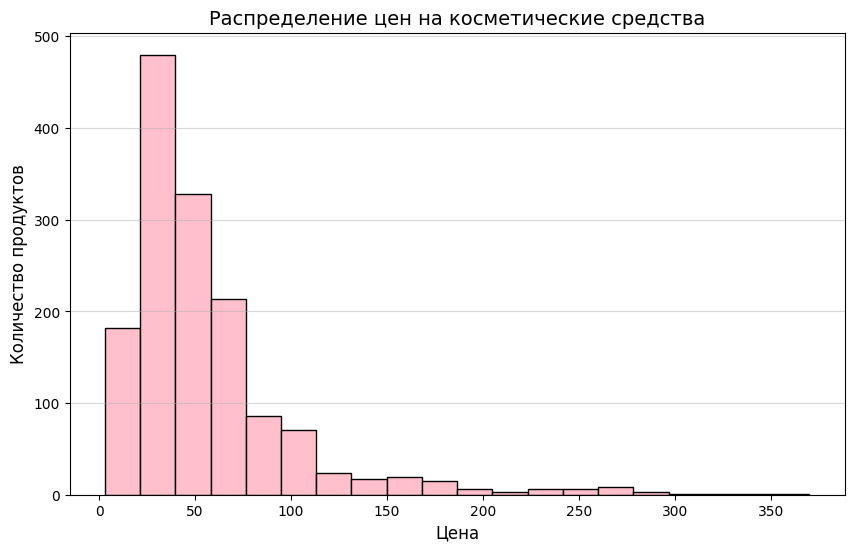

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='pink', edgecolor='black')
plt.title('Распределение цен на косметические средства', fontsize=14)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Количество продуктов', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 1.2 Диаграмма размаха цен по брендам

<Figure size 1200x600 with 0 Axes>

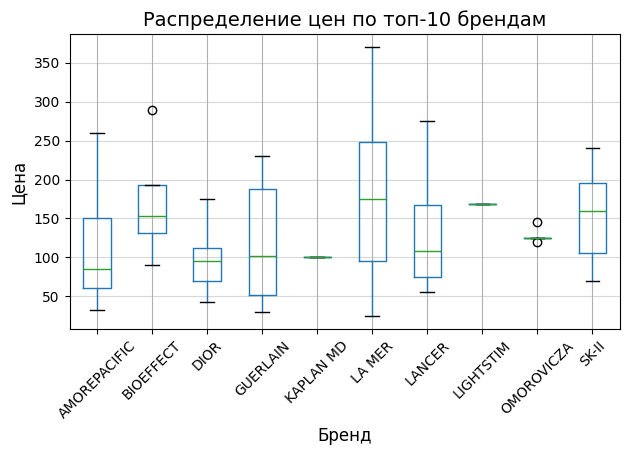

In [ ]:
top_brands = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10).index
plt.figure(figsize=(12, 6))
df[df['brand'].isin(top_brands)].boxplot(column='price', by='brand', rot=45, fontsize=10)
plt.title('Распределение цен по топ-10 брендам', fontsize=14)
plt.suptitle('')
plt.xlabel('Бренд', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

### 1.3 Круговая диаграмма распределения средств по типам кожи

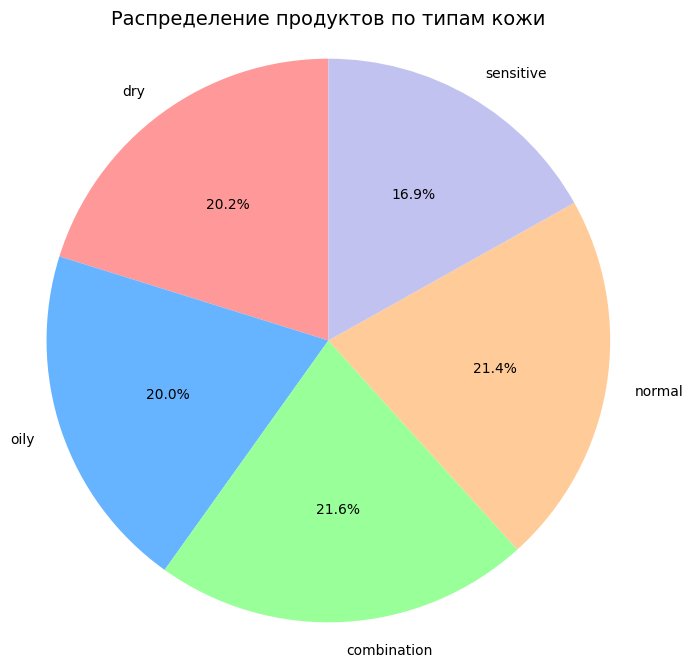

In [ ]:
skin_types = ['dry', 'oily', 'combination', 'normal', 'sensitive']
counts = [df[col].sum() for col in skin_types]
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=skin_types, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Распределение продуктов по типам кожи', fontsize=14)
plt.axis('equal')
plt.show()

## 2. Seaborn диаграммы

### 2.1 Цена vs рейтинг с распределением по типам кожи

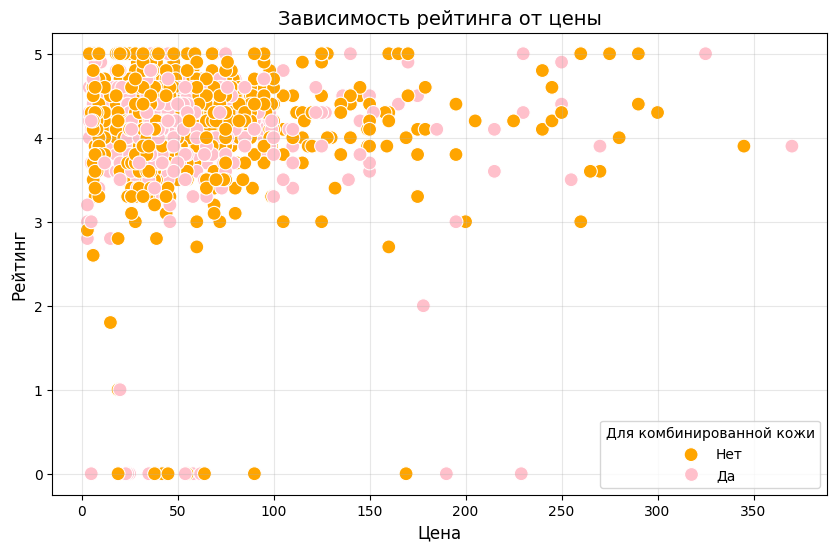

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='rank', hue='combination',
                palette={0: 'pink', 1: 'orange'}, s=100)
plt.title('Зависимость рейтинга от цены', fontsize=14)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Для комбинированной кожи', labels=['Нет', 'Да'])
plt.show()

### 2.2 Корреляция между типами кожи, рейтингом и ценой

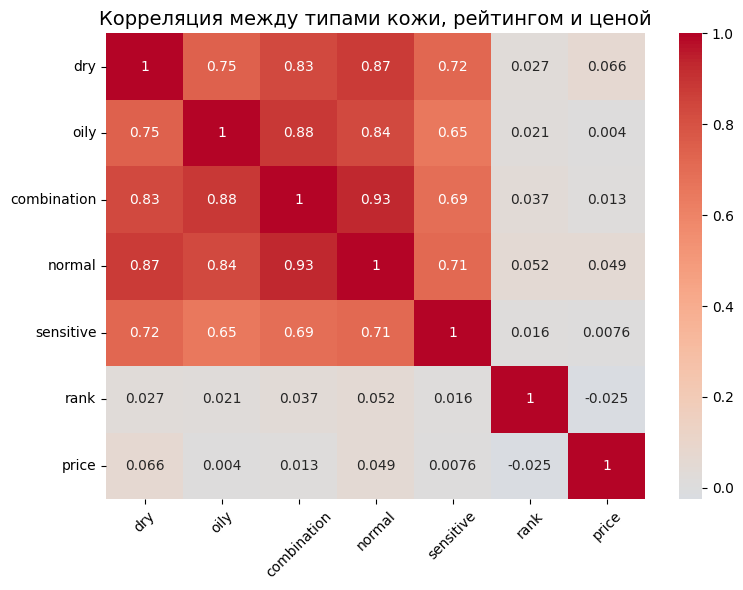

In [ ]:
plt.figure(figsize=(8, 6))
corr = df[['dry', 'oily', 'combination', 'normal', 'sensitive', 'rank', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между типами кожи, рейтингом и ценой', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Портрет типичного потребителя

**Демография:**
   - женщина 25-45 лет
   - средний уровень дохода
   - проживает в крупном городе

**Тип кожи:**
   - чаще всего комбинированная или чувствительная
   - сухость, раздражение, признаки старения

**Предпочтения:**
   - готова платить за премиальные бренды
   - ищет продукты с натуральными ингредиентами
   - обращает внимание на рейтинг

**Поведение:**
   - совершает покупки в специализированных магазинах
   - изучает состав перед покупкой
   - готова инвестировать в уходовые средства

**Мотивация:**
   - желание сохранить молодость и здоровье кожи
   - профилактика возрастных изменений
   - комфорт и безопасность

# **Выводы и рекомендации**

## 1. Итоги аналитической работы

Проведен комплексный анализ данных о косметических средствах (бренды, цены, рейтинги, типы кожи, ингредиенты).

**Использованы:**
   - предобработка данных (исправление некорректных значений, приведение столбцов к единому формату)
   - исследовательский анализ (изучение распределения данных, выявление закономерностей)
   - графический анализ (визуализация распределения косметических средств по бренду, цене, рейтингу, типу кожи, ингредиентам)

## 2. Решение бизнес-задачи

**Бизнес-задача решена. В ходе анализа выявлены:**
   - ценовые сегменты и их связь с брендами и эффективностью
   - портрет целевого потребителя
   - спрос на гипоаллергенные формулы и многофункциональность

**Новая информация**, полученная в ходе анализа:
   - потребители готовы платить за премиальные бренды
   - продукты для чувствительной кожи чаще содержат натуральные экстракты, что объясняет их высокий рейтинг

## 3. Практические рекомендации

**Для бизнеса:**
1. **Упор на безопасность.** Развитие линейки для чувствительной кожи с маркировкой «гипоаллергенно» оправдывает высокую цену.
2. **Добавление SPF** в базовые уходовые продукты для повышения конкурентоспособности.
3. **Партнерства с экспертами.** Продвижение через дерматологов усилит доверие к премиум-сегменту.

**Для пользователей:**

1. При выборе продукта для чувствительной кожи стоит обращать внимание на состав. Состав должен содержать в себе минимум отдушек, пантенол и церамиды.
2. Не всегда дорогой продукт эффективнее. В среднем сегменте есть аналоги с высоким рейтингом и безопасным составом.

## 4. Дальнейший анализ

1. **ML-модель для прогнозирования рейтинга:**
   - на основе ингредиентов и цены предсказывать успех продукта
   - из методов использовать регрессию или NLP-анализ состава

2. **Дашборд для ритейла:**
   - визуализация динамики спроса по сегментам
   - фильтры по типу кожи, цене, брендам

3. **Глубокий анализ ингредиентов:**
   - кластеризация продуктов по составу
   - выявление «ключевых компонентов» для каждого бренда